Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

Read Copy of Raw Excel File

In [2]:
excel_copy = pd.read_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Workshop 12 - Workings insurance_claims_data.xlsx")

In [3]:
excel_copy.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
excel_copy.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


In [5]:
excel_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          998 non-null    float64       
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            998 non-null    float64       
 7   policy_annual_premium        997 non-null    float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      999 non-null   

In [6]:
# Check the shape of the dataset
excel_copy.shape

(1000, 40)

In [7]:
#Missing Values
null_counts = excel_copy.isnull().sum()
null_counts

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             2
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
# Function to calculate the 5-number summary, Mean, and Mode
def extended_summary(column):
    return {
        'Minimum': column.min(),
        'Q1': column.quantile(0.25),              #The value below which 25% of the data fall
        'Median': column.median(),                #Middle figure
        'Q3': column.quantile(0.75),              #The value below which 75% of the data fall
        'Maximum': column.max(),
        'Mean': column.mean(),                     #average
        'Mode': column.mode().iat[0] if not column.mode().empty else None   #The most frequently occurring value in the column
    }

In [9]:
# Calculate the 5-number summary for each column
summary = {}
for column in excel_copy.columns:
    if pd.api.types.is_numeric_dtype(excel_copy[column]):
        summary[column] = extended_summary(excel_copy[column])

In [10]:
# Convert summary to a DataFrame for better readability
summary_excel_copy = pd.DataFrame(summary).T
print(summary_excel_copy)

                                Minimum         Q1     Median         Q3  \
months_as_customer                 0.00     115.75     199.50     276.25   
age                               19.00      32.00      38.00      44.00   
policy_number                 100804.00  335980.25  533135.00  759099.75   
policy_deductable                500.00     500.00    1000.00    2000.00   
policy_annual_premium            433.33    1090.32    1257.83    1415.74   
umbrella_limit              -1000000.00       0.00       0.00       0.00   
insured_zip                   430104.00  448404.50  466445.50  603251.00   
capital-gains                      0.00       0.00       0.00   51075.00   
capital-loss                 -111100.00  -51500.00  -23250.00       0.00   
incident_hour_of_the_day           0.00       6.00      12.00      17.00   
number_of_vehicles_involved        1.00       1.00       1.00       3.00   
bodily_injuries                    0.00       0.00       1.00       2.00   
witnesses   

In [11]:
# Save the summary to a new Excel file
print("Saving number_summary excel...")
summary_excel_copy.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\04 number_summary.xlsx")
print("Saving number_summary excel COMPLETED")

Saving number_summary excel...
Saving number_summary excel COMPLETED


Clean Data

In [12]:
#column name = _c39 has 1000 blanks and has no useful data. Remove column
df_clean = excel_copy.drop("_c39", axis = 1)

In [13]:
df_clean.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


In [14]:
# Filter on Columns that hvae Missing data in them and count

# Calculate the number of null values in each column
null_counts = df_clean.isnull().sum()

# Filter columns where the count of null values is greater than zero
columns_with_nulls = null_counts[null_counts > 0]

# filtered Missing data
print(columns_with_nulls)

age                        2
policy_deductable          2
policy_annual_premium      3
insured_education_level    1
insured_hobbies            2
capital-gains              2
authorities_contacted      2
incident_state             2
total_claim_amount         4
injury_claim               1
property_claim             1
dtype: int64


In [15]:
# Impute missing AGE values in dataset using a more sophisticated approach that considers insured_sex and insured_education_level

# Calculate mean age for each combination of insured_sex and insured_education_level
mean_age_by_group = df_clean.groupby(['insured_sex', 'insured_education_level'])['age'].mean()

# Function to impute missing age values based on group mean (rounded to nearest integer)
def impute_age(row):
    if pd.isnull(row['age']):
        mean_age = mean_age_by_group.loc[(row['insured_sex'], row['insured_education_level'])]
        return int(np.round(mean_age))  # Round mean_age and convert to integer
    else:
        return int(row['age'])  # Convert existing age to integer if it's not missing

# Apply the imputation function to fill missing age values
df_clean['age'] = df_clean.apply(impute_age, axis=1)

# Check if there are any remaining missing values
null_counts_after = df_clean['age'].isnull().sum()
print(f"Number of missing values in 'age' column after imputation: {null_counts_after}")

print("Saving Clean insurance_claims AGE excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims AGE excel COMPLETED")

Number of missing values in 'age' column after imputation: 0
Saving Clean insurance_claims AGE excel...
Saving Clean insurance_claims AGE excel COMPLETED


In [16]:
# Impute missing values in dataset

# Calculate mean 
mean_policy_deductable_by_group = df_clean.groupby(['age','insured_sex', 'auto_make'])['policy_deductable'].mean()

# Function to impute missing values based on group mean
def impute_policy_deductable(row):
    if pd.isnull(row['policy_deductable']):
        mean_policy_deductable = mean_policy_deductable_by_group.loc[(row['age'],row['insured_sex'], row['auto_make'])]
        return np.round(mean_policy_deductable) 
    else:
        return row['policy_deductable']
    
# Impute missing values to relevant column
df_clean['policy_deductable'] = df_clean.apply(impute_policy_deductable, axis=1)

# Check if there are any remaining missing values
null_counts_after = df_clean['policy_deductable'].isnull().sum()
print(f"Number of missing values in 'policy_deductable' column after imputation: {null_counts_after}")

print("Saving Clean insurance_claims policy_deductable excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims policy_deductable excel COMPLETED")

Number of missing values in 'policy_deductable' column after imputation: 0
Saving Clean insurance_claims policy_deductable excel...
Saving Clean insurance_claims policy_deductable excel COMPLETED


In [17]:
# Impute missing values in dataset

df_clean['policy_annual_premium'] = df_clean['policy_annual_premium'].replace(-999, np.nan)

# Calculate mean 
mean_policy_annual_premium_by_group = df_clean.groupby(['policy_state','insured_sex','auto_make'])['policy_annual_premium'].mean()

# Function to impute missing values based on group mean
def impute_policy_annual_premium(row):
    if pd.isnull(row['policy_annual_premium']):
        mean_policy_annual_premium = mean_policy_annual_premium_by_group.loc[(row['policy_state'],row['insured_sex'],row['auto_make'])]
        return np.round(mean_policy_annual_premium)  
    else:
        return row['policy_annual_premium']
    
# Impute missing values to relevant column
df_clean['policy_annual_premium'] = df_clean.apply(impute_policy_annual_premium, axis=1)

# Check if there are any remaining missing values
null_counts_after = df_clean['policy_annual_premium'].isnull().sum()
print(f"Number of missing values in 'policy_annual_premium' column after imputation: {null_counts_after}")

print("Saving Clean insurance_claims policy_annual_premium excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims policy_annual_premium excel COMPLETED")

Number of missing values in 'policy_annual_premium' column after imputation: 0
Saving Clean insurance_claims policy_annual_premium excel...
Saving Clean insurance_claims policy_annual_premium excel COMPLETED


In [18]:
# Impute missing values in dataset

df_clean['insured_education_level'] = df_clean['policy_annual_premium'].replace(-999, np.nan)

# Calculate mean 
mean_insured_education_level_by_group = df_clean.groupby(['age','insured_sex'])['insured_education_level'].mean()

# Function to impute missing values based on group mean
def impute_insured_education_level(row):
    if pd.isnull(row['insured_education_level']):
        mean_insured_education_level = mean_insured_education_level_by_group.loc[(row['age'],row['insured_sex'])]
        return np.round(mean_insured_education_level)  
    else:
        return row['insured_education_level']
    
# Impute missing values to relevant column
df_clean['insured_education_level'] = df_clean.apply(impute_insured_education_level, axis=1)

# Check if there are any remaining missing values
null_counts_after = df_clean['insured_education_level'].isnull().sum()
print(f"Number of missing values in 'insured_education_level' column after imputation: {null_counts_after}")

print("Saving Clean insurance_claims insured_education_level excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims insured_education_level excel COMPLETED")

Number of missing values in 'insured_education_level' column after imputation: 0
Saving Clean insurance_claims insured_education_level excel...
Saving Clean insurance_claims insured_education_level excel COMPLETED


In [19]:
#Update missing fields with unknown

df_clean['insured_hobbies'] = df_clean['insured_hobbies'].fillna('unknown')
df_clean['authorities_contacted'] = df_clean['authorities_contacted'].fillna('unknown')
df_clean['incident_state'] = df_clean['incident_state'].fillna('XX')

# Check if there are any remaining missing values
null_counts_after = df_clean['insured_hobbies'].isnull().sum()
print(f"Number of missing values in 'insured_hobbies' column after imputation: {null_counts_after}")

null_counts_after = df_clean['authorities_contacted'].isnull().sum()
print(f"Number of missing values in 'authorities_contacted' column after imputation: {null_counts_after}")

null_counts_after = df_clean['incident_state'].isnull().sum()
print(f"Number of missing values in 'incident_state' column after imputation: {null_counts_after}")

print("Saving Clean insurance_claims Unknowns_Applied excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims Unknowns_Applied excel COMPLETED")

Number of missing values in 'insured_hobbies' column after imputation: 0
Number of missing values in 'authorities_contacted' column after imputation: 0
Number of missing values in 'incident_state' column after imputation: 0
Saving Clean insurance_claims Unknowns_Applied excel...
Saving Clean insurance_claims Unknowns_Applied excel COMPLETED


In [20]:
# Function to replace '?' in property_damage based on property_claim value

question_mark_count = (df_clean['property_damage'] == '?').sum()
print("Number of '?' in property_damage:", question_mark_count)

def replace_property_damage(row):
    if row['property_damage'] == '?':
        if row['property_claim'] > 0:
            return 'YES'
        else:
            return 'NO'
    else:
        return row['property_damage']

# Impute missing values to relevant column
df_clean['property_damage'] = df_clean.apply(replace_property_damage, axis=1)

# Check if there are any remaining missing values
question_mark_count_after = (df_clean['property_damage'] == '?').sum()
print(f"Number of '?' in 'property_damage' column after imputation: {question_mark_count_after}")

print("Saving Clean insurance_claims property_damage excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims property_damage excel COMPLETED")

Number of '?' in property_damage: 360
Number of '?' in 'property_damage' column after imputation: 0
Saving Clean insurance_claims property_damage excel...
Saving Clean insurance_claims property_damage excel COMPLETED


In [21]:
# Replace '?' with 'No' in columns

question_mark_count = (df_clean['police_report_available'] == '?').sum()
print("Number of '?' in police_report_available:", question_mark_count)

df_clean['police_report_available'] = df_clean['police_report_available'].replace('?', 'NO')

# Check if there are any remaining missing values
question_mark_count_after = (df_clean['police_report_available'] == '?').sum()
print(f"Number of '?' in 'police_report_available' column after imputation: {question_mark_count_after}")

print("Saving Clean insurance_claims police_report_available excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims police_report_available excel COMPLETED")

Number of '?' in police_report_available: 343
Number of '?' in 'police_report_available' column after imputation: 0
Saving Clean insurance_claims police_report_available excel...
Saving Clean insurance_claims police_report_available excel COMPLETED


In [22]:
# Missing data in the total_claim_amount column sum the values of injury_claim, property_claim, and vehicle_claim

# Function to replace missing total_claim_amount
def fill_total_claim_amount(row):
    if pd.isnull(row['total_claim_amount']):
        return row['injury_claim'] + row['property_claim'] + row['vehicle_claim']
    else:
        return row['total_claim_amount']

# Apply the function to each row in the DataFrame
df_clean['total_claim_amount'] = df_clean.apply(fill_total_claim_amount, axis=1)

null_counts_after = df_clean['total_claim_amount'].isnull().sum()
print(f"Number of missing values in 'total_claim_amount' column after imputation: {null_counts_after}")

print("Saving Clean insurance_claims total_claim_amount excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims total_claim_amount excel COMPLETED")

Number of missing values in 'total_claim_amount' column after imputation: 0
Saving Clean insurance_claims total_claim_amount excel...
Saving Clean insurance_claims total_claim_amount excel COMPLETED


In [23]:
# Missing data in the injury_claim column: total_claim_amount - property_claim - vehicle_claim

# Function to replace missing total_claim_amount
def fill_injury_claim(row):
    if pd.isnull(row['injury_claim']):
        return row['total_claim_amount'] - row['property_claim'] - row['vehicle_claim']
    else:
        return row['injury_claim']

# Apply the function to each row in the DataFrame
df_clean['injury_claim'] = df_clean.apply(fill_total_claim_amount, axis=1)

null_counts_after = df_clean['injury_claim'].isnull().sum()
print(f"Number of missing values in 'injury_claim' column after imputation: {null_counts_after}")

print("Saving Clean insurance_claims injury_claim excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims injury_claim excel COMPLETED")

Number of missing values in 'injury_claim' column after imputation: 0
Saving Clean insurance_claims injury_claim excel...
Saving Clean insurance_claims injury_claim excel COMPLETED


In [24]:
# Missing data in the property_claim column: total_claim_amount - injury_claim - vehicle_claim

# Function to replace missing total_claim_amount
def fill_property_claim(row):
    if pd.isnull(row['property_claim']):
        return row['total_claim_amount'] - row['injury_claim'] - row['vehicle_claim']
    else:
        return row['property_claim']

# Apply the function to each row in the DataFrame
df_clean['property_claim'] = df_clean.apply(fill_total_claim_amount, axis=1)

null_counts_after = df_clean['property_claim'].isnull().sum()
print(f"Number of missing values in 'property_claim' column after imputation: {null_counts_after}")

print("Saving Clean insurance_claims property_claim excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims property_claim excel COMPLETED")

Number of missing values in 'property_claim' column after imputation: 0
Saving Clean insurance_claims property_claim excel...
Saving Clean insurance_claims property_claim excel COMPLETED


In [25]:
# Impute missing values in dataset

#df_clean['capital-gains'] = df_clean['capital-gains'].replace(-999, np.nan)

# Calculate mean 
mean_capital_gains_by_group = df_clean.groupby(['incident_type','incident_severity'])['capital-gains'].mean()

# Function to impute missing values based on group mean
def impute_capital_gains(row):
    if pd.isnull(row['capital-gains']):
        mean_capital_gains = mean_capital_gains_by_group.loc[(row['incident_type'],row['incident_severity'])]
        return np.round(mean_capital_gains)  
    else:
        return row['capital-gains']
    
# Impute missing values to relevant column
df_clean['capital-gains'] = df_clean.apply(impute_capital_gains, axis=1)

# Check if there are any remaining missing values
null_counts_after = df_clean['capital-gains'].isnull().sum()
print(f"Number of missing values in 'capital-gains' column after imputation: {null_counts_after}")

print("Saving Clean insurance_claims capital-gains excel...")
df_clean.to_excel(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\05 Clean insurance_claims.xlsx", index=False)
print("Saving Clean insurance_claims capital-gains excel COMPLETED")

Number of missing values in 'capital-gains' column after imputation: 0
Saving Clean insurance_claims capital-gains excel...
Saving Clean insurance_claims capital-gains excel COMPLETED


In [26]:
# Filter on Columns that have Missing data in them and count

# Calculate the number of null values in each column
null_counts = df_clean.isnull().sum()

# Filter columns where the count of null values is greater than zero
columns_with_nulls = null_counts[null_counts > 0]

# filtered Missing data
print(columns_with_nulls)

Series([], dtype: int64)


In [29]:
# Save DataFrame to a CSV file
output_path = r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\06 Clean insurance_claims.csv"
print("Saving Clean insurance_claims to CSV...")
df_clean.to_csv(output_path, index=False)
print("Saving Clean insurance_claims to CSV COMPLETED")

Saving Clean insurance_claims to CSV...
Saving Clean insurance_claims to CSV COMPLETED


Read CSV and Features

In [33]:
df = pd.read_csv(r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\06 Clean insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,71610.0,71610.0,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,NO,5070.0,5070.0,5070.0,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,34650.0,34650.0,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,63400.0,63400.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,6500.0,6500.0,4550,Accura,RSX,2009,N


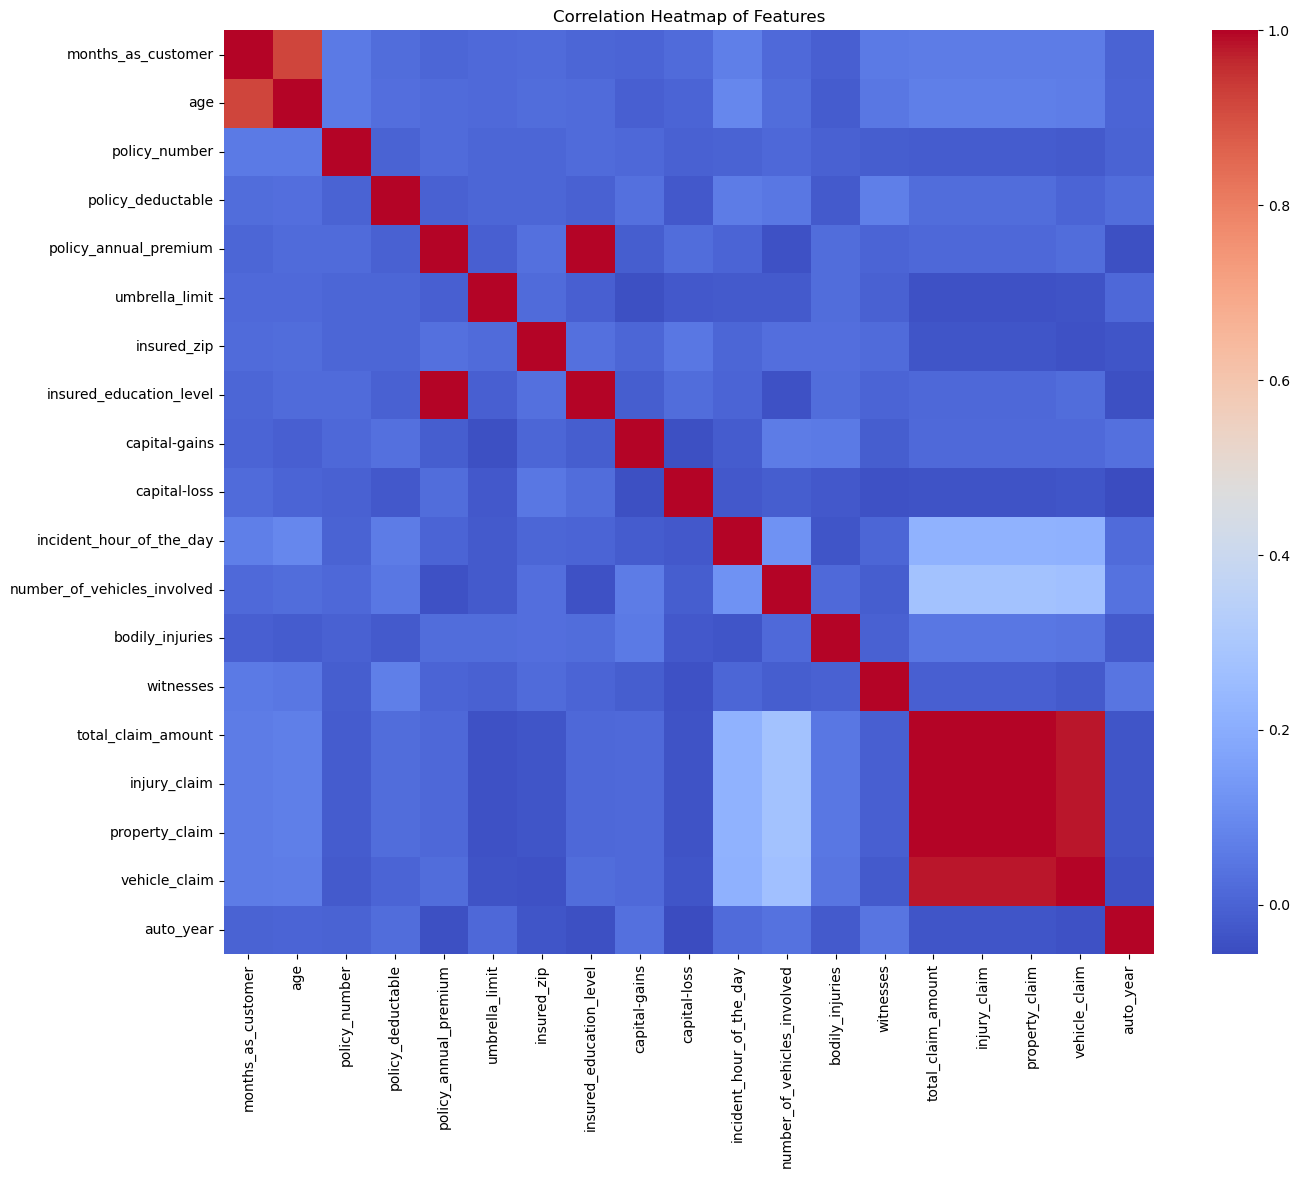

In [40]:
# plot relevant feature interactions
# Drop columns that aren't numeric
df_numeric = df.select_dtypes(include=[np.number])
#df_numeric = df_numeric.drop(columns=['Unnamed: 0'])

# Calculate the correlation matrix
correlation_matrix_numeric = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix_numeric, cmap='coolwarm', annot=False, fmt='.1f')
plt.title('Correlation Heatmap of Features')
plt.show()

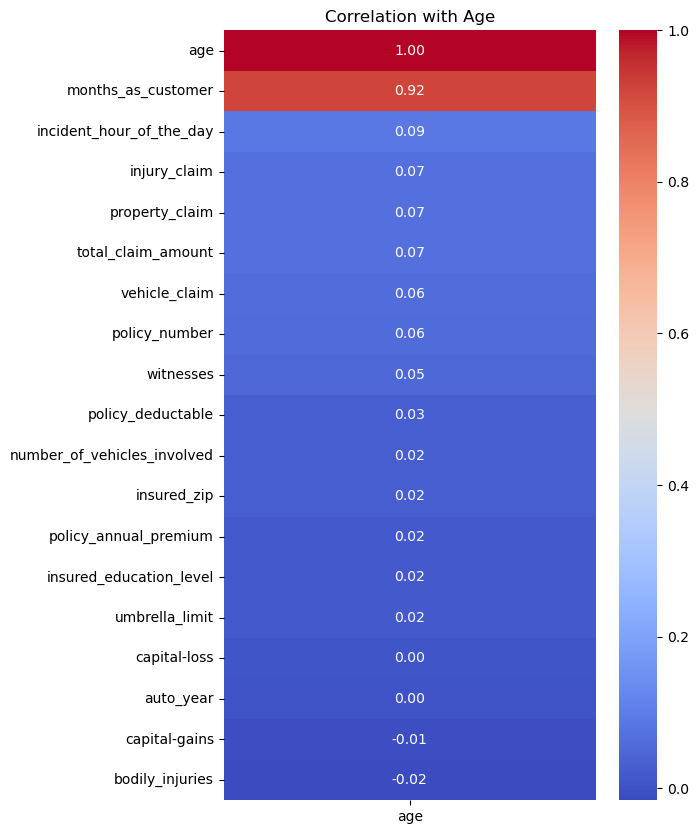

In [41]:
# Calculate and plot the feature correlations
age_correlation = correlation_matrix_numeric['age'].sort_values(ascending=False)

# Plot the correlations with load_shortfall_3h
plt.figure(figsize=(6, 10))
sns.heatmap(age_correlation.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'orientation': 'vertical'})
plt.title('Correlation with Age')
plt.show()

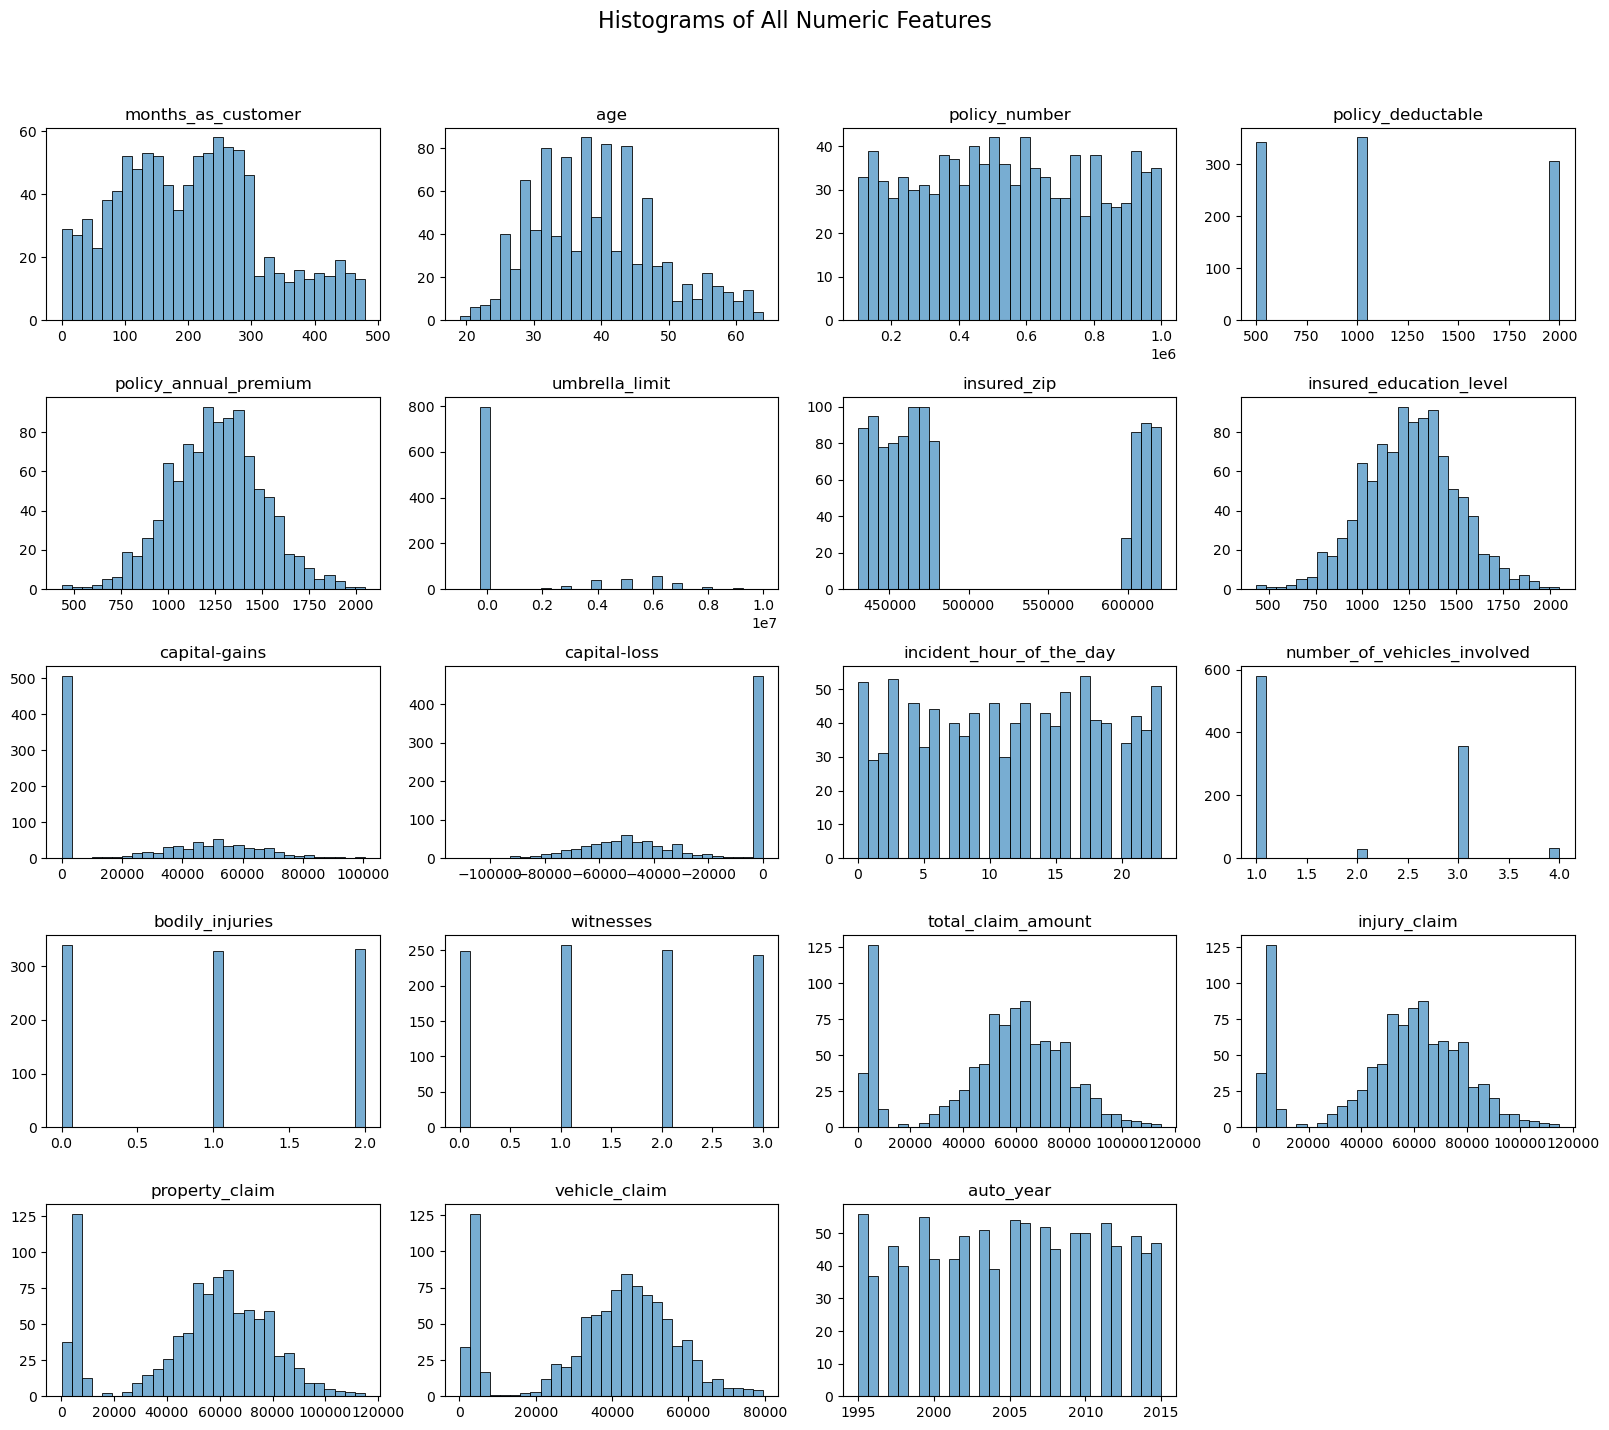

In [38]:
#Selecting only the numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Determine the number of rows and columns for the subplot grid
n_features = len(numeric_cols)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

# Plotting histograms for all numeric features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
fig.suptitle('Histograms of All Numeric Features', fontsize=16)

for i, col in enumerate(numeric_cols):
    ax = axes[i//n_cols, i%n_cols]
    sns.histplot(df[col], kde=False, ax=ax, bins=30, alpha=0.6)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide empty subplots
for i in range(n_features, n_rows*n_cols):
    axes[i//n_cols, i%n_cols].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

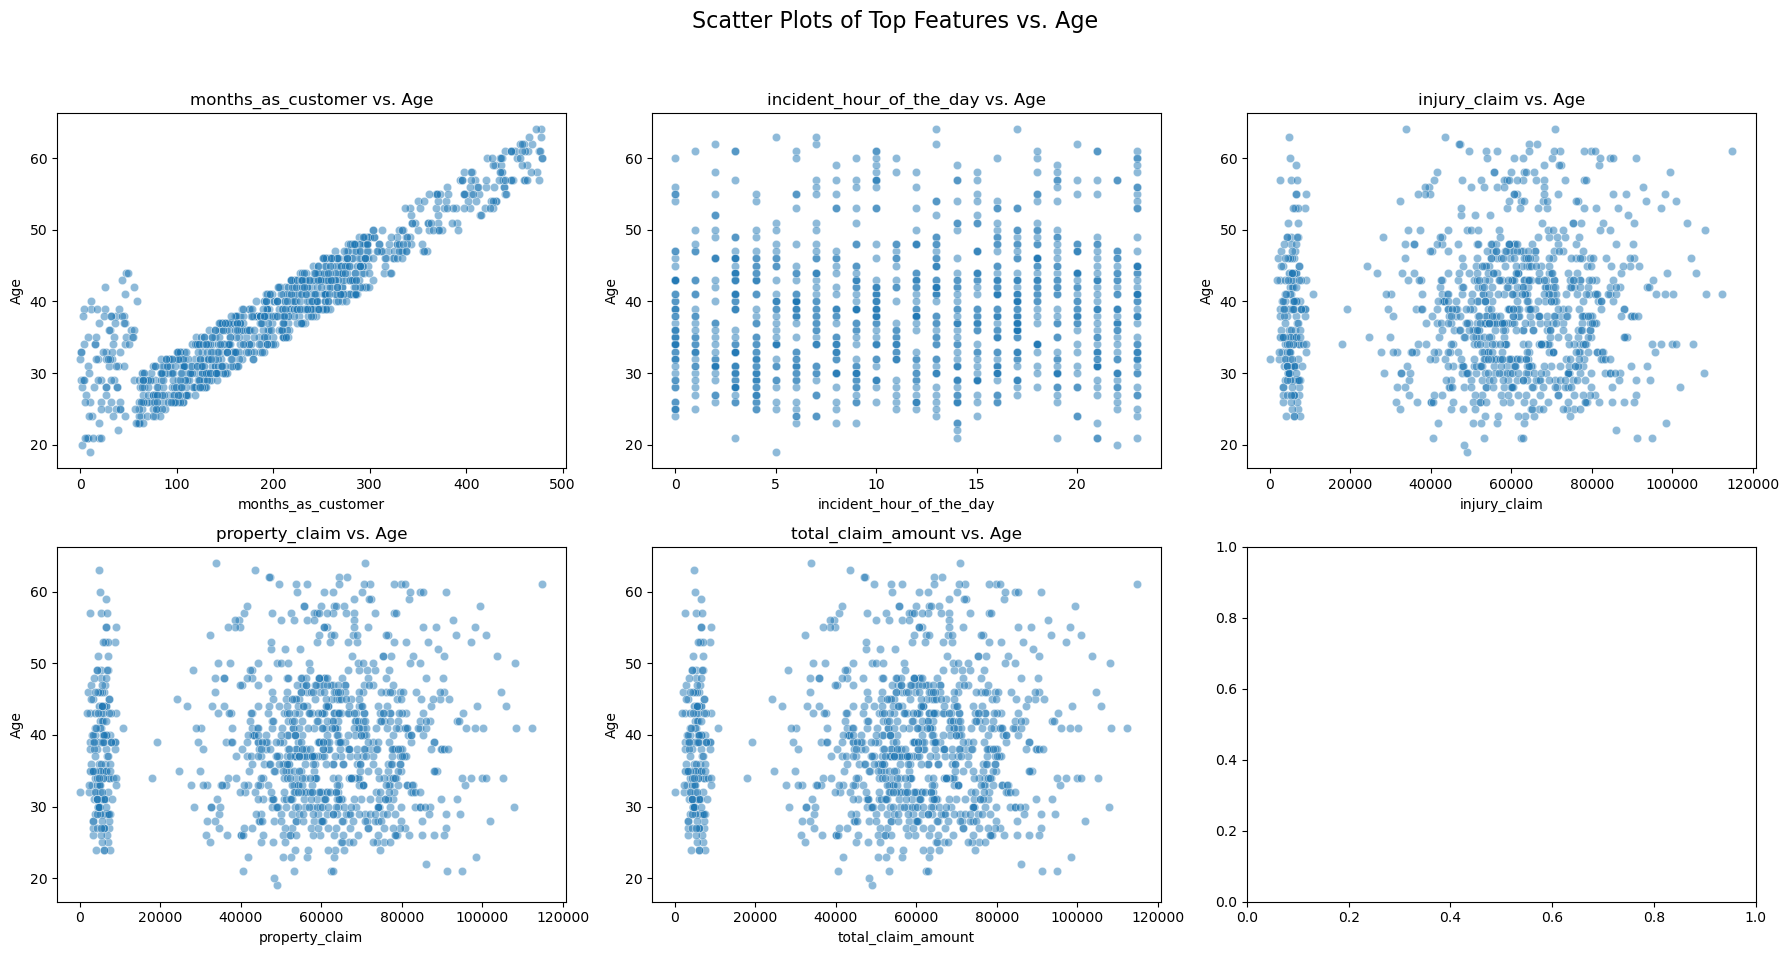

In [43]:
# evaluate correlation
# Select top features based on their correlation with 
top_features = age_correlation.head(6).index.drop('age')

# Plot scatter plots for the top correlated features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
fig.suptitle('Scatter Plots of Top Features vs. Age', fontsize=16)

for i, feature in enumerate(top_features):
    row, col = divmod(i, 3)
    sns.scatterplot(ax=axes[row, col], data=df_numeric, x=feature, y='age', alpha=0.5)
    axes[row, col].set_title(f'{feature} vs. Age', fontsize=12)
    axes[row, col].set_xlabel(feature, fontsize=10)
    axes[row, col].set_ylabel('Age', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

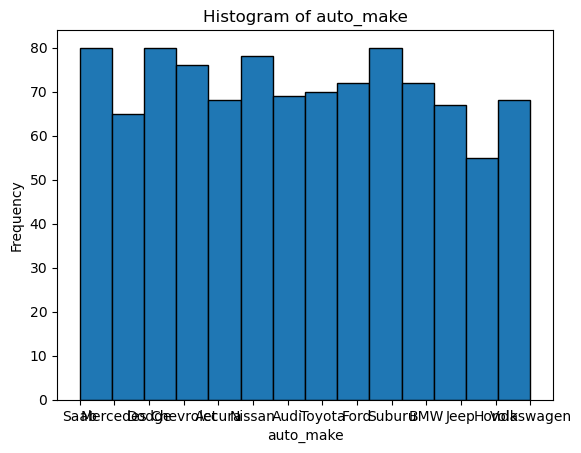

In [45]:
# Choose the column for the histogram
column_name = 'auto_make'

# Plot the histogram
plt.hist(df[column_name], bins=14, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

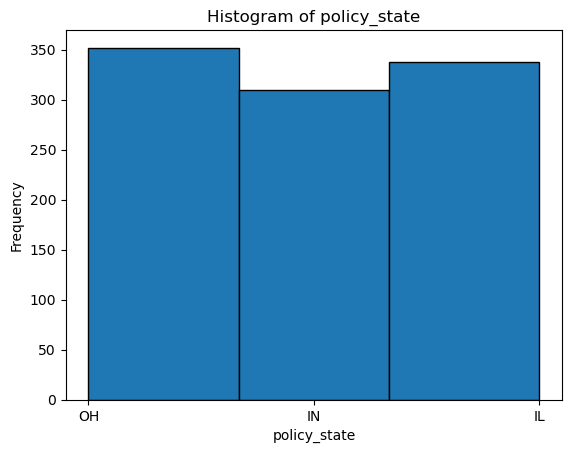

In [47]:
# Choose the column for the histogram
column_name = 'policy_state'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

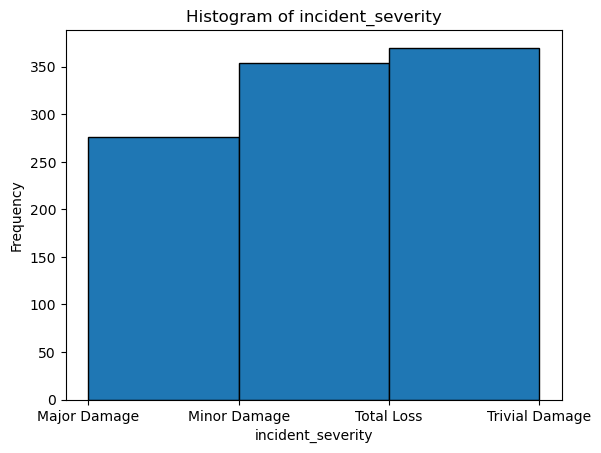

In [48]:
# Choose the column for the histogram
column_name = 'incident_severity'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [50]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['ages_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

In [51]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,71610.0,71610.0,52080,Saab,92x,2004,Y,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,NO,5070.0,5070.0,5070.0,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,34650.0,34650.0,23100,Dodge,RAM,2007,N,Young Adult
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,63400.0,63400.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,6500.0,6500.0,4550,Accura,RSX,2009,N,Middle Aged


In [52]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [53]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,71610.0,71610.0,71610.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,5070.0,5070.0,5070.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,34650.0,34650.0,34650.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,63400.0,63400.0,63400.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,6500.0,6500.0,6500.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


In [54]:
df["Contract Years"] = df["months_as_customer"]/12

In [55]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,71610.0,71610.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,5070.0,5070.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,34650.0,34650.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,63400.0,63400.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,6500.0,6500.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


In [57]:
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']

In [58]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,71610.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,5070.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,34650.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,63400.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,6500.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [59]:
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

In [60]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


In [61]:
# Save DataFrame to a CSV file with advanced features
output_path = r"C:\Users\ksimpson\OneDrive - Ninety One\HomeDriveData\Backup\Personal Work PC\_Data Science Course Academy AI\Integrated Workshop Project\Output\07 Advanced Features insurance_claims.csv"
print("Saving advanced features insurance_claims to CSV...")
df_clean.to_csv(output_path, index=False)
print("Saving advanced features insurance_claims to CSV COMPLETED")

Saving advanced features insurance_claims to CSV...
Saving advanced features insurance_claims to CSV COMPLETED
